# Machine Learning in Astrophysics

In this workshop, we'll be learning how to apply a Decision Tree Classification algorithm to classify unknown gamma-ray emitters.

## Detecting Gamma-rays

<img src=https://img1.wikia.nocookie.net/__cb20071104233556/psychology/images/8/83/Atmospheric_electromagnetic_transmittance_or_opacity.jpg>

Because the atmosphere is opaque to gamma-rays, gamma-rays are absorbed by our atmosphere. One method to observe gamma-rays is to put a gamma-ray detector in space!

We'll be using observations taken by the Fermi-LAT satellite.  
<img src=https://fermi.gsfc.nasa.gov/inc/img/spacecraft.jpg>

Fermi-LAT is a pair-conversion telescope that converts gamma-ray photons into electron-positron pairs. Remember, $E = mc^2$ means we can convert between electromagnetic energy (gamma-rays) and mass (electrons and positrons). These electron-positron pairs are then tracked, absorbed, and measured within the satellite's detector mass. This allows Fermi-LAT to detect gamma-ray photons and determine where in the sky the photon came from.

## UFOs $\rightarrow$ Unidentified Fermi Objects!

One of Fermi-LAT's greatest achievements is the catalog of gamma-ray emitters that it has produced. This has revolutionized our understanding of the high-energy universe! Despite the interest in Fermi-LAT, we still don't know what a significant number of these gamma-ray emitters are. They could be anything from known objects like distant galaxies, high-energy pulsars, binaries. More exotic objects like protoplanetary nebula, giant molecular clouds, stellar bowshocks. Or even potential dark matter subhalos! sources...

In this workshop, we'll try to understand what these unknown sources might be!

## Workshop Steps:
0. [Load the data](#section0)  
1. [Prepare and clean the data](#section1)  
2. [Feature engineering](#section2)  
3. [Split the dataset into training and testing data](#section3)  
4. [Train and improve our model](#section4)  
5. [Make predictions](#section5)  
6. [Discuss the limitations of our model](#section6)  
7. [Conclusions](#section7)


In [ ]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<a name="section0"></a>  
# 0. Load the Data

We'll be loading the Fermi-LAT 4FGL point source catalog. This is stored as a FITS file, so we'll use `astropy.io.fits` to open it.  
The catalog itself is stored as a `BinTableHDU`. We'll use `astropy.table.Table` to read the table and convert it to a `pandas` DataFrame.


In [ ]:
!wget https://fermi.gsfc.nasa.gov/ssc/data/access/lat/14yr_catalog/gll_psc_v35.fit

--2024-12-09 15:52:57--  https://fermi.gsfc.nasa.gov/ssc/data/access/lat/14yr_catalog/gll_psc_v35.fit
Resolving fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)... 129.164.179.26, 2001:4d0:2310:150::26
Connecting to fermi.gsfc.nasa.gov (fermi.gsfc.nasa.gov)|129.164.179.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7819200 (7.5M) [application/fits]
Saving to: ‘gll_psc_v35.fit’

gll_psc_v35.fit     100%[===================>]   7.46M  3.89MB/s    in 1.9s    

2024-12-09 15:52:59 (3.89 MB/s) - ‘gll_psc_v35.fit’ saved [7819200/7819200]



In [ ]:
hdul = fits.open("./gll_psc_v35.fit")
hdul.info()

Filename: ./gll_psc_v35.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    456   7195R x 79C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8E, 16E, 8E, 8E, E, E, E, E, E, E, D, E, 14E, 28E, 14E, 18A, 18A, 18A, 18A, 18A, 18A, A, 30A, 5A, 10A, 28A, 30A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   82R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    121   1991R x 10C   [I, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   19R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     73   20R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     40   15R x 1C   [D]   
  7  GTI           1 BinTableHDU     37   80251R x 2C   [D, D]   


In [ ]:
lat_psc = Table.read(hdul[1])
lat_psc

Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,LP_EPeak,Unc_LP_EPeak,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_IndexS,Unc_PLEC_IndexS,PLEC_ExpfactorS,Unc_PLEC_ExpfactorS,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,PLEC_EPeak,Unc_PLEC_EPeak,Npred,Flux_Band,Unc_Flux_Band,nuFnu_Band,Sqrt_TS_Band,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History,Unc_Flux_History,Sqrt_TS_History,ASSOC_4FGL,ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
,,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,MeV,ph / (s cm2),ph / (s cm2),erg / (s cm2),erg / (s cm2),,ph / (MeV s cm2),ph / (MeV s cm2),,,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,MeV,MeV,ph / (MeV s cm2),ph / (MeV s cm2),,,,,,,,MeV,MeV,,ph / (s cm2),ph / (s cm2),erg / (s cm2),,,,,,ph / (s cm2),ph / (s cm2),s,s,ph / (s cm2),ph / (s cm2),,,,,,,,,,,,,,,,deg,deg,deg,
str18,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,str18,float32,float32,float32,float32,float32,float32,str17,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32[8],"float32[8,2]",float32[8],float32[8],float32,float32,float32,float32,float32,float32,float64,float32,float32[14],"float32[14,2]",float32[14],str18,str18,str18,str18,str18,str18,str1,str30,str5,str10,str28,str30,float32,float32,float64,float64,float32,int16
4FGL J0000.3-7355,1,0.0983,-73.9220,307.7090,-42.7295,0.0324,0.0315,-62.700,0.0525,0.0510,-62.700,1726,,8.493,1917.72,1.4796e-10,2.1770e-11,1.7352e-12,2.6915e-13,PowerLaw,4.2844e-14,6.2686e-15,2.2474,0.1174,4.8417e-14,8.4813e-15,2.1280,0.1969,0.1100,0.1119,1.118,1071.71,1443.50,4.8620e-14,8.0372e-15,2.0489,0.2070,0.18232,0.15102,0.6667,--,1.329,1427.56,2230.54,411.91,2.0565643e-08 .. 5.1613483e-17,-1.6676287e-08 .. 2.0635616e-12,3.2624888e-12 .. 8.333941e-18,1.1720686 .. 0.0,12.8350,0.0000,10.0000,-inf,-inf,-inf,-inf,-inf,6.084946e-12 .. 3.1096483e-09,-- .. 1.5917939e-09,0.0 .. 2.4133372,4FGL J0000.3-7355,,,,,,N,,,,,,0.0000,0.0000,--,--,--,0
4FGL J0000.5+0743,2,0.1375,7.7273,101.6565,-53.0295,0.0945,0.0700,-10.220,0.1533,0.1135,-10.220,106,,5.681,1379.88,1.5541e-10,3.0373e-11,1.9306e-12,3.7501e-13,PowerLaw,9.7825e-14,1.8354e-14,2.3308,0.1310,1.1449e-13,2.4667e-14,2.2470,0.1913,0.1097,0.1065,1.194,447.47,737.20,1.0522e-13,2.1944e-14,2.2473,0.1789,0.06567,0.10380,0.6667,--,0.000,--,--,384.92,3.750181e-12 .. 9.930329e-16,-- .. 2.7929685e-12,5.929706e-16 .. 1.554265e-16,0.0 .. 0.0,25.5690,0.5617,0.2739,-inf,-inf,-inf,-inf,-inf,1.5356434e-09 .. 2.4428466e-09,-1.1904873e-09 .. 2.4088174e-09,1.4323782 .. 1.2026387,4FGL J0000.5+0743,,,,,,N,,,,,,0.0000,0.0000,--,--,--,0
4FGL J0000.7+2530,3,0.1878,25.5153,108.7751,-35.9592,0.0514,0.0410,82.400,0.0833,0.0665,82.400,1344,,4.197,5989.26,6.7792e-11,2.2785e-11,8.0505e-13,2.4709e-13,PowerLaw,2.1343e-15,6.5433e-16,1.8562,0.1934,3.0265e-15,1.0188e-15,1.8019,0.3299,0.2511,0.1814,1.689,8885.66,6262.71,3.3732e-15,1.1067e-15,1.6250,0.3854,0.68800,0.40956,0.6667,--,1.791,9534.83,4121.65,95.18,5.159399e-14 .. 9.303994e-14,-- .. 3.4502763e-12,8.312768e-18 .. 1.7575507e-14,0.0 .. 0.016723227,13.1493,0.0000,10.0000,-inf,-inf,-inf,-inf,-inf,1.3094809e-09 .. 5.0288596e-10,-6.474343e-10 .. 7.7705853e-10,3.7604396 .. 0.990755,4FGL J0000.7+2530,,,,,,N,,,,,,0.0000,0.0000,--,--,--,0
4FGL J0001.2+4741,1,0.3126,47.6859,114.2502

## 0.1 Remove Data with Multiple Entries

Some of the columns (e.g., `Flux_Band`) contain multiple entries. We'll remove these columns to simplify our dataset.


In [ ]:
names = [name for name in lat_psc.colnames if len(lat_psc[name].shape) <= 1]
df_psc = lat_psc[names].to_pandas()

In [ ]:
print (f"We have a total of {len(df_psc)} entries")

We have a total of 7195 entries


In [ ]:
df_psc.head()

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,...,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
0,4FGL J0000.3-7355,1,0.0983,-73.921997,307.708984,-42.729538,0.032378,0.031453,-62.700001,0.0525,...,,,,,0.000000,0.000000,NaN,NaN,NaN,0
1,4FGL J0000.5+0743,2,0.1375,7.727300,101.656479,-53.029457,0.094544,0.069999,-10.220000,0.1533,...,,,,,0.000000,0.000000,NaN,NaN,NaN,0
2,4FGL J0000.7+2530,3,0.1878,25.515301,108.775070,-35.959175,0.051373,0.041012,82.400002,0.0833,...,,,,,0.000000,0.000000,NaN,NaN,NaN,0
3,4FGL J0001.2+4741,1,0.3126,47.685902,114.250198,-14.338059,0.036880,0.033180,-45.900002,0.0598,...,bcu,,B3 2358+474,,0.996097,0.938563,0.329341,47.700201,8.400000e-07,0
4,4FGL J0001.2-0747,1,0.3151,-7.797100,89.032722,-67.305008,0.018440,0.017577,64.099998,0.0299,...,bll,,PMN J0001-0746,,0.997014,0.932932,0.325104,-7.774145,1.800000e-07,0


## 0.2 Relabel the Data

The 4FGL catalog uses two naming conventions. When an association is confirmed, the class is shown in capital letters. When the association isn't strictly confirmed, lowercase letters are used.

The identification vs. association depends on factors such as correlated variability, morphology, etc. For our purposes, we'll consider all associations to be confirmed as identifications.


In [ ]:
source_types = set(df_psc["CLASS1"])
source_types

{'     ',
 'AGN  ',
 'BCU  ',
 'BIN  ',
 'BLL  ',
 'FSRQ ',
 'GAL  ',
 'GC   ',
 'HMB  ',
 'LMB  ',
 'MSP  ',
 'NLSY1',
 'NOV  ',
 'PSR  ',
 'PWN  ',
 'RDG  ',
 'SFR  ',
 'SNR  ',
 'SPP  ',
 'UNK  ',
 'agn  ',
 'bcu  ',
 'bin  ',
 'bll  ',
 'css  ',
 'fsrq ',
 'gal  ',
 'glc  ',
 'hmb  ',
 'lmb  ',
 'msp  ',
 'nlsy1',
 'psr  ',
 'pwn  ',
 'rdg  ',
 'sbg  ',
 'sey  ',
 'sfr  ',
 'snr  ',
 'spp  ',
 'ssrq ',
 'unk  '}

Let's write a function to convert the string `CLASS1` to lowercase, remove trailing spaces, and label anything unidentified as `'unk'`.


In [ ]:
def reclassify(row):
    # Lower converts to lower case
    # Strip removes trailing white space
    cl = row.lower().strip()
    if cl == '':
        cl = 'unk'
    return cl



In [ ]:
df_psc["CLASS1"] = df_psc["CLASS1"].map(reclassify)
df_psc.head()

,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,...,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
0,4FGL J0000.3-7355,1,0.0983,-73.921997,307.708984,-42.729538,0.032378,0.031453,-62.700001,0.0525,...,unk,,,,0.000000,0.000000,NaN,NaN,NaN,0
1,4FGL J0000.5+0743,2,0.1375,7.727300,101.656479,-53.029457,0.094544,0.069999,-10.220000,0.1533,...,unk,,,,0.000000,0.000000,NaN,NaN,NaN,0
2,4FGL J0000.7+2530,3,0.1878,25.515301,108.775070,-35.959175,0.051373,0.041012,82.400002,0.0833,...,unk,,,,0.000000,0.000000,NaN,NaN,NaN,0
3,4FGL J0001.2+4741,1,0.3126,47.685902,114.250198,-14.338059,0.036880,0.033180,-45.900002,0.0598,...,bcu,,B3 2358+474,,0.996097,0.938563,0.329341,47.700201,8.400000e-07,0
4,4FGL J0001.2-0747,1,0.3151,-7.797100,89.032722,-67.305008,0.018440,0.017577,64.099998,0.0299,...,bll,,PMN J0001-0746,,0.997014,0.932932,0.325104,-7.774145,1.800000e-07,0


Convert the spectrum type from strings to numbers:

In [ ]:
spectra = list(set(df_psc["SpectrumType"]))
def class_spectrum(row):
    for i, cl in enumerate(spectra):
        if row == cl:
            break
    return i

df_psc["SpectrumType"] = df_psc["SpectrumType"].map(class_spectrum)

<a name="section1"></a>  
# 1. Preparing the Data

To prepare the data, we want to extract the useful information from the data frame. We also need to be careful not to leak any information that might bias our model.


## 1.1 Removing Association and Getting the Target/Label

Since we want to classify unknown objects and try to determine what they are, let's remove the source's association and any other identifying information. This won't be available for unknown sources!

Here, our "target" or "label" will be the source's association.


In [ ]:
labels = df_psc["CLASS1"]
all_labels = set(labels)
# -1 because we won't be classifying 'unk' sources
print (f"We have {len(all_labels)-1} class types")
print (all_labels)

We have 23 class types
{'rdg', 'unk', 'sfr', 'nov', 'psr', 'ssrq', 'gal', 'gc', 'snr', 'msp', 'css', 'sey', 'nlsy1', 'sbg', 'hmb', 'fsrq', 'pwn', 'bcu', 'bll', 'glc', 'bin', 'spp', 'agn', 'lmb'}


In [ ]:
# Remove the association and counter part columns
keys = [k for k in df_psc.columns if ("ASSOC" not in k and "Counterpart" not in k)]
print (keys)


['Source_Name', 'DataRelease', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT', 'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng', 'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num', 'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType', 'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'LP_EPeak', 'Unc_LP_EPeak', 'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_IndexS', 'Unc_PLEC_IndexS', 'PLEC_ExpfactorS', 'Unc_PLEC_ExpfactorS', 'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'PLEC_EPeak', 'Unc_PLEC_EPeak', 'Npred', 'Variability_Index', 'Frac_Variability', 'Unc_Frac_Variability', 'Signif_Peak', 'Flux_Peak', 'Unc_Flux_Peak', 'Time_Peak', 'Peak_Interval', 'TEVCAT_FLAG', 'CLASS1', 'CLASS2', 'Flags']


In [ ]:
# Remove identifing information
exclude = [
    'DataRelease',
    'Conf_68_PosAng', 'Conf_95_PosAng',
    'ROI_num', 'Extended_Source_Name',
    'RAJ2000', 'DEJ2000',  # We'll take the Galactic Lon (GLON) and Galactic Latitude (GLAT)
    'TEVCAT_FLAG', 'CLASS2', 'Flags',
    'Unc_Frac_Variability', # Uncertinty in how variable it it. This isn't well-defined
    'Time_Peak', 'Peak_Interval', # If the source is variable, we don't care when it was at it's brightest
    'Unc_PLEC_Exp_Index', 'Signif_Peak'
          ]

keys = [k for k in keys if k not in exclude]
print (keys)

['Source_Name', 'GLON', 'GLAT', 'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType', 'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'LP_EPeak', 'Unc_LP_EPeak', 'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_IndexS', 'Unc_PLEC_IndexS', 'PLEC_ExpfactorS', 'Unc_PLEC_ExpfactorS', 'PLEC_Exp_Index', 'PLEC_SigCurv', 'PLEC_EPeak', 'Unc_PLEC_EPeak', 'Npred', 'Variability_Index', 'Frac_Variability', 'Flux_Peak', 'Unc_Flux_Peak', 'CLASS1']


In [ ]:
df_reduced = df_psc[keys]
df_reduced.head()

,Source_Name,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_95_SemiMajor,Conf_95_SemiMinor,Signif_Avg,Pivot_Energy,Flux1000,...,PLEC_Exp_Index,PLEC_SigCurv,PLEC_EPeak,Unc_PLEC_EPeak,Npred,Variability_Index,Frac_Variability,Flux_Peak,Unc_Flux_Peak,CLASS1
0,4FGL J0000.3-7355,307.708984,-42.729538,0.032378,0.031453,0.0525,0.0510,8.492646,1917.715454,1.479606e-10,...,0.666667,1.329241,1427.556396,2230.540283,411.909851,12.834996,0.000000,-inf,-inf,unk
1,4FGL J0000.5+0743,101.656479,-53.029457,0.094544,0.069999,0.1533,0.1135,5.681097,1379.882935,1.554103e-10,...,0.666667,0.000000,NaN,NaN,384.919708,25.568989,0.561723,-inf,-inf,unk
2,4FGL J0000.7+2530,108.775070,-35.959175,0.051373,0.041012,0.0833,0.0665,4.197268,5989.263184,6.779151e-11,...,0.666667,1.791354,9534.827148,4121.653320,95.184700,13.149277,0.000000,-inf,-inf,unk
3,4FGL J0001.2+4741,114.250198,-14.338059,0.036880,0.033180,0.0598,0.0538,5.523873,3218.100098,1.215529e-10,...,0.666667,0.000000,NaN,NaN,271.438385,28.915590,0.663905,5.738964e-09,1.713242e-09,bcu
4,4FGL J0001.2-0747,89.032722,-67.305008,0.018440,0.017577,0.0299,0.0285,24.497219,2065.146729,7.024454e-10,...,0.666667,1.171456,797.877136,3014.195312,1204.733154,51.742390,0.429135,1.632524e-08,2.337450e-09,bll


In [ ]:
df_reduced.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_95_SemiMajor,Conf_95_SemiMinor,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,...,Unc_PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,PLEC_EPeak,Unc_PLEC_EPeak,Npred,Variability_Index,Frac_Variability,Flux_Peak,Unc_Flux_Peak
count,7195.000000,7195.000000,7105.000000,7105.000000,7105.000000,7105.000000,7194.000000,7195.000000,7.195000e+03,7.194000e+03,...,7.191000e+03,7191.000000,7195.000000,4.788000e+03,4.788000e+03,7195.000000,7.195000e+03,7195.000000,7.195000e+03,7.195000e+03
mean,183.132599,0.743767,0.057264,0.044649,0.092851,0.072397,15.701175,2733.545410,1.350051e-09,6.980248e-11,...,1.710960e-01,0.665899,2.694271,2.591914e+04,1.372819e+06,1427.819580,-inf,-inf,-inf,-inf
std,112.117607,35.936916,0.046511,0.030814,0.075415,0.049963,29.390438,3966.514160,1.840191e-08,1.087079e-10,...,1.483610e-01,0.017649,6.128449,6.712488e+05,8.194140e+07,5640.877930,NaN,NaN,NaN,NaN
min,0.042404,-87.969360,0.004502,0.004440,0.007300,0.007200,0.024616,54.042686,1.015092e-11,7.016551e-12,...,8.172455e-36,0.221034,0.000000,3.961106e-02,8.722919e+00,11.915721,-inf,-inf,-inf,-inf
25%,82.476997,-21.873463,0.028184,0.025039,0.045700,0.040600,5.280337,1105.388672,1.467361e-10,2.865141e-11,...,5.248953e-02,0.666667,0.465931,5.662150e+02,4.002390e+02,325.631378,1.143453e+01,0.000000,NaN,NaN
50%,182.273224,-0.004612,0.044651,0.037189,0.072400,0.060300,7.794947,1789.375977,2.770740e-10,3.981436e-11,...,1.334729e-01,0.666667,1.816682,1.856001e+03,1.170048e+03,595.782593,1.641460e+01,0.166052,NaN,NaN
75%,287.337677,24.734880,0.072280,0.055382,0.117200,0.089800,14.657692,3136.032715,6.448548e-10,6.737097e-11,...,2.692976e-01,0.666667,3.218210,9.392703e+03,5.534194e+03,1061.443237,2.814625e+01,0.467705,2.038295e-09,4.553143e-10
max,359.992157,88.682228,0.533161,0.380027,0.864500,0.616200,897.974976,173796.171875,1.330866e-06,3.615690e-09,...,3.096419e+00,1.000000,257.052399,4.560933e+07,5.650350e+09,284295.468750,9.603806e+04,3.661907,5.058845e-06,3.490365e-08


## 1.2 Categorical vs. Numerical Data

In machine learning, it's important to differentiate between categorical and numerical data, as they require different handling and processing methods.

- **Categorical Data**: This type of data represents categories or labels and can take on a limited number of distinct values. For example, in our dataset, a "spectrum type" could be a categorical feature, where the values might include labels like "Gamma", "X-ray", or "Optical". Categorical data is often non-ordinal (no inherent order) but can sometimes be ordinal (where the categories have a specific order, such as "Low", "Medium", "High").

  - **Handling Categorical Data**: Categorical data needs to be converted into a format that machine learning algorithms can understand. Common techniques for this include:
    - **Label Encoding**: Assigning a unique integer to each category.
    - **One-Hot Encoding**: Creating a binary column for each category, marking the presence of that category with a 1 and the absence with a 0.

- **Numerical Data**: This data type consists of numbers and can be continuous (e.g., height, weight) or discrete (e.g., count of items). Numerical data is often the most straightforward type of data to process for machine learning models.

  - **Handling Numerical Data**: Numerical data may need to be scaled or normalized, especially if the values vary widely. This ensures that all features contribute equally to the model and helps algorithms converge more quickly. Common methods include:
    - **Standardization**: Scaling the data so it has a mean of 0 and a standard deviation of 1.
    - **Normalization**: Rescaling the data to fit within a specific range, typically 0 to 1.

Understanding how to properly handle and transform categorical and numerical data ensures that the model can make the best use of the available information and improve prediction accuracy.


Normally we'd use [SciKit learn to transform our data](https://scikit-learn.org/stable/data_transforms.html), but here we'll do it by hand to see what goes into the methods.


In [ ]:
col_names = set(df_reduced.columns)
num_cols = set(df_reduced._get_numeric_data())
cat_cols = col_names - num_cols

num_cols = list(num_cols)
cat_cols = list(cat_cols)

print ("Numerical Columns")
print (num_cols)
print ("\n-----\n")

print ("Catagorical Columns")
print (cat_cols)

Numerical Columns
['LP_Flux_Density', 'LP_EPeak', 'Npred', 'Unc_LP_Flux_Density', 'GLON', 'LP_SigCurv', 'GLAT', 'Unc_Energy_Flux100', 'Conf_95_SemiMajor', 'PLEC_Flux_Density', 'Conf_95_SemiMinor', 'Unc_PLEC_ExpfactorS', 'PLEC_ExpfactorS', 'Unc_LP_Index', 'Unc_LP_beta', 'Unc_PLEC_IndexS', 'PLEC_Exp_Index', 'Variability_Index', 'Unc_PL_Flux_Density', 'SpectrumType', 'Pivot_Energy', 'PLEC_EPeak', 'Flux1000', 'LP_Index', 'Conf_68_SemiMinor', 'Energy_Flux100', 'Signif_Avg', 'LP_beta', 'PL_Index', 'Flux_Peak', 'Unc_Flux1000', 'Frac_Variability', 'Unc_Flux_Peak', 'PL_Flux_Density', 'PLEC_SigCurv', 'PLEC_IndexS', 'Unc_PLEC_EPeak', 'Unc_PLEC_Flux_Density', 'Conf_68_SemiMajor', 'Unc_PL_Index', 'Unc_LP_EPeak']

-----

Catagorical Columns
['Source_Name', 'CLASS1']


<Figure size 2400x2400 with 0 Axes>

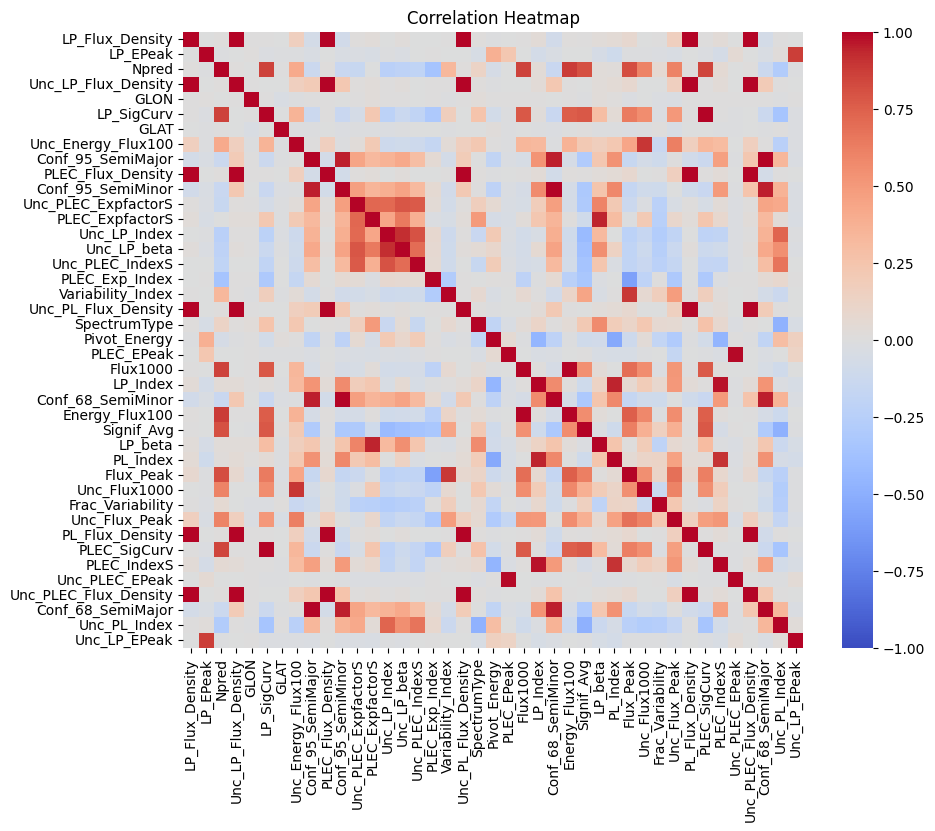

In [ ]:
# Calculate the correlation matrix
cormat = df_reduced[num_cols].corr()

fig = plt.figure(figsize = (24,24))
# Set the colormap and color range
cmap = sns.color_palette("coolwarm", as_cmap=True)  # You can change the colormap as needed
vmin, vmax = -1, 1  # Set the range for the color scale

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(cormat, cmap=cmap, vmin=vmin, vmax=vmax, annot=False, fmt=".2f")  # You can add annotations with fmt=".2f"

# Set plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

## 1.3 Remove Highly Correlated Columns

Highly correlated columns may indicate redundant information or features that are closely related to another variable. Including these columns in the model can lead to issues such as multicollinearity, where the model struggles to determine the individual effect of each feature on the target variable. This can reduce the model's ability to generalize and increase variance, leading to overfitting.

To identify and remove highly correlated columns, we can compute the correlation matrix for the dataset. Features with a correlation coefficient above a certain threshold (e.g., 0.9) are considered highly correlated and can be dropped or combined. This ensures that the model uses only the most relevant, independent features, which can improve performance and reduce complexity.

In summary, removing highly correlated columns helps in creating a more efficient model by reducing redundancy and improving generalization.


In [ ]:
exclude_corr = [
    'Unc_PLEC_IndexS', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_Flux_Peak',
    'Unc_Energy_Flux100', 'PLEC_Flux_Density', 'Conf_95_SemiMinor', 'Unc_LP_EPeak',
    'PLEC_SigCurv', 'Conf_68_SemiMajor',
    'Pivot_Energy', 'PL_Flux_Density', 'Conf_68_SemiMinor', 'Energy_Flux100',
    'Unc_PL_Flux_Density', 'Unc_LP_Index', 'Unc_PLEC_EPeak', 'Unc_LP_beta', 'LP_EPeak',
    'PLEC_EPeak', 'PLEC_IndexS', 'Unc_PLEC_ExpfactorS', 'Unc_Flux1000', 'Unc_LP_Flux_Density',
    'Unc_PLEC_Flux_Density', 'Conf_95_SemiMajor'
]

keys = [k for k in df_reduced.columns if k not in exclude_corr]
df_reduced_corr = df_reduced[keys]

['GLON', 'GLAT', 'Signif_Avg', 'Flux1000', 'SpectrumType', 'PL_Index', 'LP_Index', 'LP_beta', 'LP_SigCurv', 'PLEC_ExpfactorS', 'PLEC_Exp_Index', 'Npred', 'Variability_Index', 'Frac_Variability', 'Flux_Peak']


<Figure size 2400x2400 with 0 Axes>

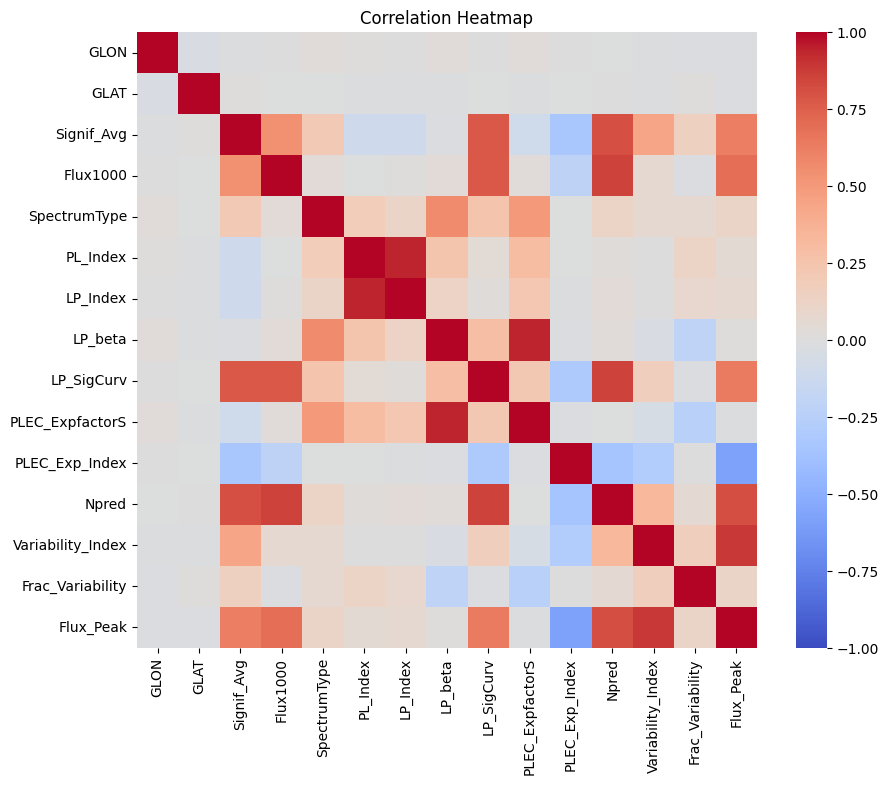

In [ ]:
# Calculate the correlation matrix
keys = list(df_reduced_corr.columns)
keys.remove("CLASS1")
keys.remove("Source_Name")
print (keys)
cormat = df_reduced_corr[keys].corr()

fig = plt.figure(figsize = (24,24))
# Set the colormap and color range
cmap = sns.color_palette("coolwarm", as_cmap=True)  # You can change the colormap as needed
vmin, vmax = -1, 1  # Set the range for the color scale

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(cormat, cmap=cmap, vmin=vmin, vmax=vmax, annot=False, fmt=".2f")  # You can add annotations with fmt=".2f"

# Set plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

<a name="section2"></a>  
# 2. Feature Engineering

A lot of machine learning models work best with data that is either normally distributed or scaled between 0 and 1. To make the data easier to work with, we may need to apply some transformations.

It's important to remember that we must apply the same transformation to all datasets to avoid data leakage. For instance, if we subtract a number from the training dataset, we need to subtract **the same number** from the test set and any other dataset (including the dataset we want to make predictions on).

For example, if we perform the following transformation on the training data:
```python
training_feature = training_feature - np.min(training_feature)
```
Then we should apply the same transformation to the test set and any future datasets as follows:
```python
value = np.min(training_feature)
training_feature = training_feature - value
test_feature = test_feature - value
real_feature = real_feature - value
```

This ensures that all datasets are on the same scale, allowing the model to make accurate predictions without bias introduced by differing data transformations.


# 2.0 Split the Dataset

We'll split the dataset into three parts:

* **Training Data**: This is the data we'll use to train our machine learning model. The model learns from this data to make predictions.
* **Test Data**: This data is used to evaluate the performance of the trained model. It allows us to see how well the model generalizes to new, unseen data.
* **Unknown Data**: This will consist of the unknown sources that we want to make predictions on. Our trained model will be applied to this data to predict the class or label of these unknown sources.


In [ ]:
known_key = df_reduced_corr["CLASS1"] != "unk"
df_known = df_reduced_corr[known_key]
df_unknown = df_reduced_corr[~known_key]

# Create training and testing datasets. We'll use a random 80-20% split between the two:
n_known = len(df_known)
split = int(0.8*n_known)
indices = np.random.permutation(np.arange(n_known))
df_train = df_known.iloc[indices[:split]]
df_test = df_known.iloc[indices[split:]]


In [ ]:
df_train.head()

,Source_Name,GLON,GLAT,Signif_Avg,Flux1000,SpectrumType,PL_Index,LP_Index,LP_beta,LP_SigCurv,PLEC_ExpfactorS,PLEC_Exp_Index,Npred,Variability_Index,Frac_Variability,Flux_Peak,CLASS1
5593,4FGL J1830.0+1324,42.607689,10.746295,14.126889,5.199472e-10,0,2.130702,2.039060,0.085874,1.561396,0.110271,0.666667,800.970703,34.101921,0.479572,1.426055e-08,bll
6186,4FGL J2000.9-1748,24.008142,-23.112904,46.636375,2.367745e-09,2,2.237818,2.192322,0.057944,3.754773,0.047075,0.666667,3849.101807,601.417847,0.938786,1.308804e-07,fsrq
4131,4FGL J1515.7-2321,340.956207,28.653561,5.581728,1.474999e-10,0,1.902003,1.864740,0.135302,1.138470,0.224465,0.666667,183.075287,9.796313,0.000000,-inf,bcu
98,4FGL J0019.6+7327,120.632820,10.726480,18.718227,8.252241e-10,2,2.608850,2.637368,0.107137,3.051930,0.197225,0.666667,2128.889648,494.149200,1.373587,1.119233e-07,fsrq
6983,4FGL J2311.0+3425,100.413605,-24.023064,95.334259,3.847638e-09,2,2.347123,2.237701,0.100465,9.300282,0.098526,0.666667,8989.656250,2648.036865,0.834465,2.186174e-07,fsrq


In [ ]:
df_test.head()

,Source_Name,GLON,GLAT,Signif_Avg,Flux1000,SpectrumType,PL_Index,LP_Index,LP_beta,LP_SigCurv,PLEC_ExpfactorS,PLEC_Exp_Index,Npred,Variability_Index,Frac_Variability,Flux_Peak,CLASS1
3043,4FGL J1142.0+1548,244.509979,70.308556,20.880785,6.960336e-10,0,2.276100,2.265466,0.019486,0.766554,0.024500,0.666667,1676.332397,19.846550,0.182129,-inf,bll
3829,4FGL J1417.9+4613,86.827217,64.369621,3.522235,4.159631e-11,0,2.957262,2.909102,0.081037,0.414308,0.234014,0.666667,466.157196,37.113350,0.800990,1.086692e-08,fsrq
341,4FGL J0116.5-2812,225.304443,-84.340752,6.045664,1.204978e-10,0,2.200092,2.254781,-0.035358,0.241058,0.065479,0.666667,286.141663,25.378225,0.577754,-inf,bll
876,4FGL J0327.0-3751,241.156082,-55.765629,4.211840,8.257611e-11,0,2.448183,2.459917,-0.050974,0.502127,-0.014721,0.666667,316.358948,18.068428,0.204948,-inf,bcu
449,4FGL J0143.3-0119,150.875214,-61.348251,3.466435,6.683348e-11,0,2.562245,2.527449,-0.098357,1.452685,-0.026672,0.666667,264.440887,19.146957,0.399527,-inf,bcu


In [ ]:
df_unknown.head()

,Source_Name,GLON,GLAT,Signif_Avg,Flux1000,SpectrumType,PL_Index,LP_Index,LP_beta,LP_SigCurv,PLEC_ExpfactorS,PLEC_Exp_Index,Npred,Variability_Index,Frac_Variability,Flux_Peak,CLASS1
0,4FGL J0000.3-7355,307.708984,-42.729538,8.492646,1.479606e-10,0,2.247396,2.128013,0.109999,1.117561,0.182318,0.666667,411.909851,12.834996,0.000000,-inf,unk
1,4FGL J0000.5+0743,101.656479,-53.029457,5.681097,1.554103e-10,0,2.330765,2.246985,0.109660,1.194232,0.065669,0.666667,384.919708,25.568989,0.561723,-inf,unk
2,4FGL J0000.7+2530,108.775070,-35.959175,4.197268,6.779151e-11,0,1.856152,1.801879,0.251122,1.689082,0.688003,0.666667,95.184700,13.149277,0.000000,-inf,unk
7,4FGL J0001.6+3503,111.538116,-26.710260,6.475026,1.891931e-10,2,2.449254,2.154877,0.324241,2.418026,0.654485,0.666667,335.825531,11.198676,0.000000,-inf,unk
11,4FGL J0002.1+6721c,118.203491,4.939485,6.391003,5.001652e-10,2,2.518880,2.641635,0.244720,3.182654,0.556309,0.666667,815.708618,7.720544,0.000000,-inf,unk


In [ ]:
print(f"Number of samples in training data: {len(df_train)}")
print(f"Number of samples in test data: {len(df_test)}")
print(f"Number of samples in unknown data: {len(df_unknown)}")

Number of samples in training data: 3705
Number of samples in test data: 927
Number of samples in unknown data: 2563


## 2.1 Handling Missing, Null, NaN, and Infinite Values

In machine learning, it's common to encounter incomplete data. This might include missing values, null entries, or values that are deliberately set to unphysical values (such as infinity or very large numbers). It's important to handle these issues before training the model, as they can negatively impact model performance.

There are several strategies for dealing with missing or invalid values, including:

- **Removing Rows or Columns**: If the missing data is minimal, one option is to simply remove the affected rows or columns from the dataset.
- **Imputation**: For missing values, we can replace them with a reasonable estimate. This could be the mean, median, or mode of the column, or even a value predicted from other features in the dataset.
- **Replacing Infinite Values**: We can replace infinite values (both positive and negative) with a large finite number, or remove the rows/columns containing them.

By carefully addressing missing, null, NaN, and infinite values, we ensure the dataset is clean and ready for model training.


In [ ]:
df_train.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,GLON,GLAT,Signif_Avg,Flux1000,SpectrumType,PL_Index,LP_Index,LP_beta,LP_SigCurv,PLEC_ExpfactorS,PLEC_Exp_Index,Npred,Variability_Index,Frac_Variability,Flux_Peak
count,3705.000000,3705.000000,3704.000000,3.705000e+03,3705.000000,3704.000000,3702.000000,3702.000000,3705.000000,3701.000000,3701.000000,3705.000000,3.705000e+03,3705.000000,3.705000e+03
mean,179.546936,1.595435,20.383627,1.905454e-09,0.838057,2.248081,2.176290,0.135326,3.063164,0.241653,0.665594,1872.632202,-inf,-inf,-inf
std,104.957207,39.966671,36.608692,2.548311e-08,0.956510,0.295974,0.349826,0.136967,7.783012,0.283722,0.022208,7539.703613,NaN,NaN,NaN
min,0.150241,-87.680092,0.024616,1.015092e-11,0.000000,1.213077,0.850825,-0.128125,0.000000,-0.254681,0.221034,14.380418,-inf,-inf,-inf
25%,89.305046,-28.714878,6.430545,1.541491e-10,0.000000,2.023779,1.924477,0.044535,0.800294,0.052365,0.666667,336.599762,1.312558e+01,0.000000,NaN
50%,176.023956,0.171085,10.444759,2.861671e-10,0.000000,2.251612,2.176648,0.099315,1.738781,0.127871,0.666667,639.618286,2.011504e+01,0.291604,NaN
75%,274.209961,32.813686,20.490911,7.084005e-10,2.000000,2.473383,2.431918,0.189513,3.177545,0.327779,0.666667,1341.418701,4.632078e+01,0.577096,1.563045e-08
max,359.992157,87.570763,897.974976,1.330866e-06,2.000000,3.328158,3.288755,1.144088,253.718277,2.241610,1.000000,284295.468750,9.603806e+04,3.661907,5.058845e-06


We have some issues with the `Variability_Index`, `Frac_Variability`, and `Flux_Peak` columns. Let's review them:

* **`Variability_Index`**: This is the sum of the log-likelihood difference between the flux fitted in each time interval and the average flux over the full catalog interval. A value greater than 27.69 over 12 intervals indicates less than a 1% chance of the source being steady.
* **`Frac_Variability`**: This represents the fractional variability computed from the fluxes in each year. It measures the extent of variability in the source's emission over time.
* **`Flux_Peak`**: This is the peak integral photon flux from 100 MeV to 100 GeV, expressed in photon/cm²/s. This measures the highest observed flux of the source.

These columns are related to the variability of the source. Given that we're focused on variability, we might not need all of these features for the model. Let's start by excluding the `Flux_Peak` column, as it may not provide additional information on variability.

Next, we can set `Variability_Index` and `Frac_Variability` to zero for sources that aren't variable. If a source isn't variable, both of these values should be low. Setting them to zero helps ensure consistency and removes the potential influence of steady sources on our model.


In [ ]:
col_names = list(df_train.columns)
if "Flux_Peak" in col_names:
  col_names.remove("Flux_Peak")

print (len(col_names))

# Remove from all the dataset
df_train = df_train[col_names]
df_test = df_test[col_names]
df_unknown = df_unknown[col_names]

# Get the minimum variabiltiy index from valid measurements
invalid_mask = ~np.isfinite(df_train["Variability_Index"])
min_var = np.min(df_train["Variability_Index"][~invalid_mask])
df_train.loc[invalid_mask, "Variability_Index"] = min_var

# Apply same transformation to test and unknown data
invalid_mask = ~np.isfinite(df_test["Variability_Index"])
df_test.loc[invalid_mask, "Variability_Index"] = min_var
invalid_mask = ~np.isfinite(df_unknown["Variability_Index"])
df_unknown.loc[invalid_mask, "Variability_Index"] = min_var



invalid_mask = ~np.isfinite(df_train["Frac_Variability"])
min_frac = np.min(df_train["Frac_Variability"][~invalid_mask])
df_train.loc[invalid_mask, "Frac_Variability"] = min_frac

invalid_mask = ~np.isfinite(df_test["Frac_Variability"])
df_test.loc[invalid_mask, "Frac_Variability"] = min_frac
invalid_mask = ~np.isfinite(df_unknown["Frac_Variability"])
df_unknown.loc[invalid_mask, "Frac_Variability"] = min_frac


df_train.describe()

16


,GLON,GLAT,Signif_Avg,Flux1000,SpectrumType,PL_Index,LP_Index,LP_beta,LP_SigCurv,PLEC_ExpfactorS,PLEC_Exp_Index,Npred,Variability_Index,Frac_Variability
count,3705.000000,3705.000000,3704.000000,3.705000e+03,3705.000000,3704.000000,3702.000000,3702.000000,3705.000000,3701.000000,3701.000000,3705.000000,3705.000000,3705.000000
mean,179.546936,1.595435,20.383627,1.905454e-09,0.838057,2.248081,2.176290,0.135326,3.063164,0.241653,0.665594,1872.632202,231.995209,0.364870
std,104.957207,39.966671,36.608692,2.548311e-08,0.956510,0.295974,0.349826,0.136967,7.783012,0.283722,0.022208,7539.703613,2110.518066,0.389758
min,0.150241,-87.680092,0.024616,1.015092e-11,0.000000,1.213077,0.850825,-0.128125,0.000000,-0.254681,0.221034,14.380418,3.196750,0.000000
25%,89.305046,-28.714878,6.430545,1.541491e-10,0.000000,2.023779,1.924477,0.044535,0.800294,0.052365,0.666667,336.599762,13.125583,0.000000
50%,176.023956,0.171085,10.444759,2.861671e-10,0.000000,2.251612,2.176648,0.099315,1.738781,0.127871,0.666667,639.618286,20.115042,0.291604
75%,274.209961,32.813686,20.490911,7.084005e-10,2.000000,2.473383,2.431918,0.189513,3.177545,0.327779,0.666667,1341.418701,46.320782,0.577096
max,359.992157,87.570763,897.974976,1.330866e-06,2.000000,3.328158,3.288755,1.144088,253.718277,2.241610,1.000000,284295.468750,96038.062500,3.661907


Let's take a look at the dataset

In [ ]:
col_names = list(df_train.columns)
# These will be catagorical
col_names.remove("SpectrumType")
col_names.remove("Source_Name")
col_names.remove("CLASS1")

print(len(col_names))

13


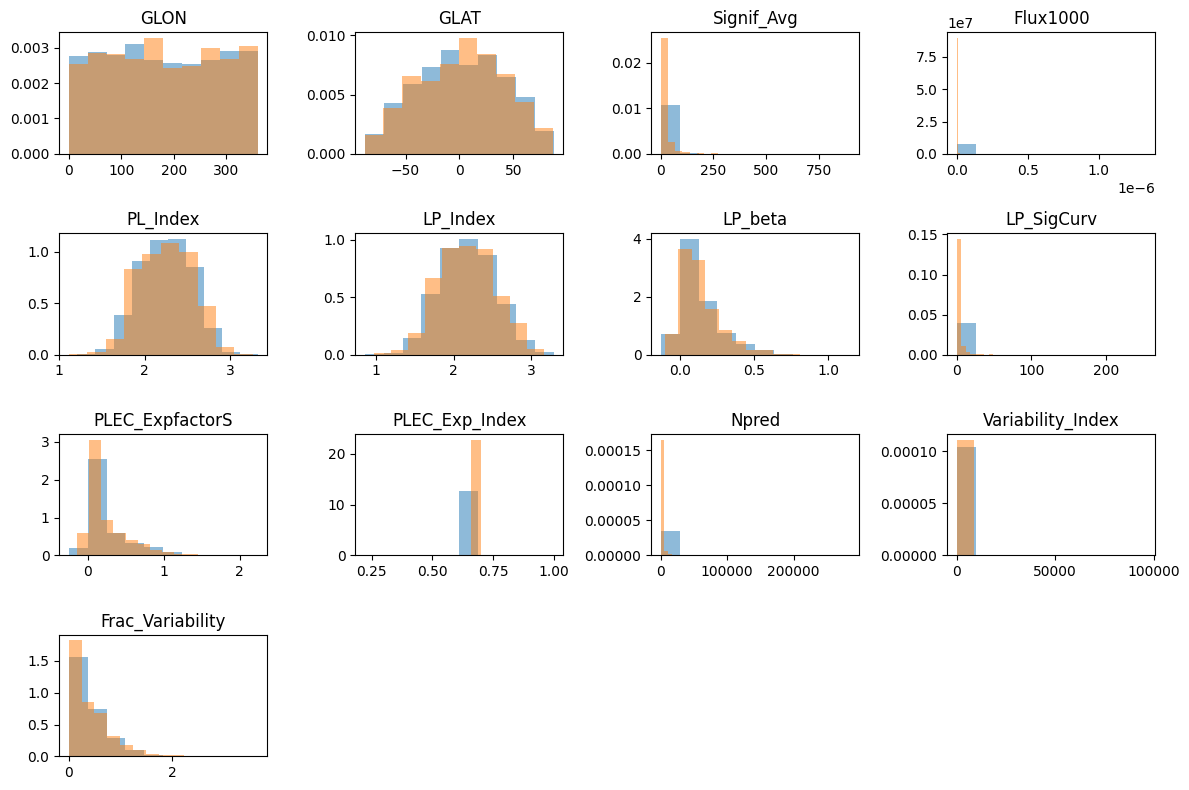

In [ ]:
fig = plt.figure(figsize = (12,8))
cols, rows = 4, 4

for i, lab in enumerate(col_names):
    ax = plt.subplot(cols, rows, i +1)
    ax.hist(df_train[lab], density = True, alpha = 0.5)
    ax.hist(df_test[lab], density = True, alpha = 0.5)
    ax.set_title(lab)

fig.tight_layout()

## 2.2 Feature Engineering

Feature engineering involves modifying and transforming the features in a dataset to make them more suitable for machine learning models. This process can include applying mathematical transformations, creating new features through combinations, or modifying existing values to improve their predictive power.

In this workshop, we'll apply two common transformations:

* **Logarithmic Transformation**: Taking the $\log_{10}$ of larger values. Often, data can be log-distributed, meaning that values span multiple orders of magnitude. In these cases, working with the logarithm of the values can make the data more manageable and improve the model's ability to learn. By converting the data into log-space, we can reduce the impact of large outliers and focus more on the underlying patterns.

* **Min-Max Normalization**: This involves rescaling the values in the dataset so that the minimum value becomes 0 and the maximum value becomes 1. All other values are scaled linearly between 0 and 1. This normalization technique ensures that features with larger numerical ranges don't dominate the model and that all features are on a comparable scale, making them more effective predictors.

Both of these transformations will help make the data more consistent and easier for the model to process, potentially improving its accuracy and performance.


In [ ]:
log_feat = ["Npred", "Variability_Index", "LP_SigCurv", "Flux1000", "Signif_Avg"]

for feat in log_feat:
    # Add a small value as log10(0) = infinity
    df_train[feat] = np.log10(df_train[feat] + 1e-9)
    df_test[feat] = np.log10(df_test[feat] + 1e-9)
    df_unknown[feat] = np.log10(df_unknown[feat] + 1e-9)



Min-Max normalization is given by the following formula:

$$ f(x, min, max) = \frac{x - min}{max - min} $$

In this formula:
- \( x \) represents the original value of the feature.
- \( min \) is the minimum value of the feature in the dataset.
- \( max \) is the maximum value of the feature in the dataset.

This formula rescales the values of \( x \) so that they lie between 0 and 1. The minimum value of the feature becomes 0, and the maximum value becomes 1, with all other values linearly transformed to fit within this range. This ensures that all features are on a comparable scale, which helps the machine learning model perform more effectively.


In [ ]:
def norm_min_max(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

In [ ]:
for feat in col_names:
    x_min = df_train[feat].min()
    x_max = df_train[feat].max()
    df_train[feat] = df_train[feat].map(lambda x : norm_min_max(x, x_min, x_max))

    # Apply to test and unknown data
    df_test[feat] = df_test[feat].map(lambda x : norm_min_max(x, x_min, x_max))
    df_unknown[feat] = df_unknown[feat].map(lambda x : norm_min_max(x, x_min, x_max))

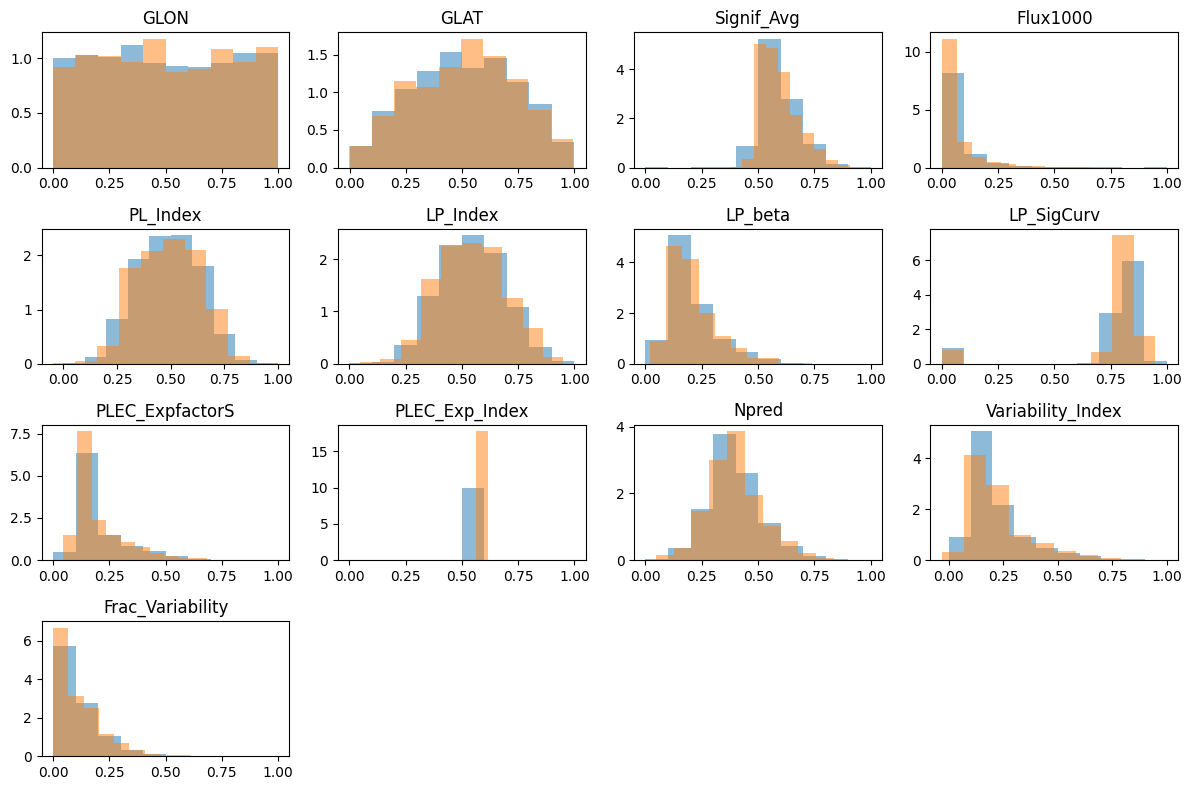

In [ ]:
fig = plt.figure(figsize = (12,8))
cols, rows = 4, 4

for i, lab in enumerate(col_names):
    ax = plt.subplot(cols, rows, i +1)
    ax.hist(df_train[lab], density = True, alpha = 0.5)
    ax.hist(df_test[lab], density = True, alpha = 0.5)
    ax.set_title(lab)

fig.tight_layout()

<a name="section3"></a>
# 3. Splitting the Dataset

Our goal is to classify all unknown targets. To focus on training and evaluating our model, we will temporarily remove these unknown targets from the dataset. This allows us to work with a dataset containing only known sources, which will help us build and test our model's performance before applying it to the unknown targets.

Once the model is trained and validated, we can use it to predict the class of the unknown sources.



To prepare the target variable for classification, we need to convert the source type strings into integers. This is often referred to as **label encoding**, where each unique source type (string) is mapped to a unique integer label (0, 1, 2, ...).

For example, suppose the source types are "Galaxy", "Pulsar", and "Blazar". We would assign them integer values as follows:
- "Galaxy" → 0
- "Pulsar" → 1
- "Blazar" → 2

We can accomplish this transformation using Python's `LabelEncoder` from the `sklearn.preprocessing` module. In this example we'll do it by hand!


In [ ]:
targets = list(set(df_psc["CLASS1"]))
print (targets)

# We'll use a dictionary as an encoder
encoder = {}
for i, tar in enumerate(targets):
    encoder[tar] = i

print (encoder)

df_train["Labels"] = df_train["CLASS1"].apply(lambda x : encoder[x])
df_test["Labels"] = df_test["CLASS1"].apply(lambda x : encoder[x])

df_train.head()

['rdg', 'unk', 'sfr', 'nov', 'psr', 'ssrq', 'gal', 'gc', 'snr', 'msp', 'css', 'sey', 'nlsy1', 'sbg', 'hmb', 'fsrq', 'pwn', 'bcu', 'bll', 'glc', 'bin', 'spp', 'agn', 'lmb']
{'rdg': 0, 'unk': 1, 'sfr': 2, 'nov': 3, 'psr': 4, 'ssrq': 5, 'gal': 6, 'gc': 7, 'snr': 8, 'msp': 9, 'css': 10, 'sey': 11, 'nlsy1': 12, 'sbg': 13, 'hmb': 14, 'fsrq': 15, 'pwn': 16, 'bcu': 17, 'bll': 18, 'glc': 19, 'bin': 20, 'spp': 21, 'agn': 22, 'lmb': 23}


,Source_Name,GLON,GLAT,Signif_Avg,Flux1000,SpectrumType,PL_Index,LP_Index,LP_beta,LP_SigCurv,PLEC_ExpfactorS,PLEC_Exp_Index,Npred,Variability_Index,Frac_Variability,CLASS1,Labels
5593,4FGL J1830.0+1324,0.117989,0.561631,0.604735,0.056871,0,0.433849,0.487395,0.168210,0.806141,0.146198,0.572082,0.406389,0.229596,0.130962,bll,18
6186,4FGL J2000.9-1748,0.066301,0.368427,0.718429,0.167609,2,0.484492,0.550261,0.146256,0.839555,0.120882,0.572082,0.565081,0.507951,0.256365,fsrq,15
4131,4FGL J1515.7-2321,0.947099,0.663812,0.516337,0.017745,0,0.325721,0.415892,0.207062,0.794111,0.191943,0.572082,0.257183,0.108616,0.000000,bcu,17
98,4FGL J0019.6+7327,0.334821,0.561518,0.631526,0.082347,2,0.659915,0.732812,0.184924,0.831663,0.181031,0.572082,0.505210,0.488897,0.375101,fsrq,15
6983,4FGL J2311.0+3425,0.278632,0.363234,0.786496,0.218310,2,0.536171,0.568875,0.179679,0.874096,0.141493,0.572082,0.650832,0.651717,0.227877,fsrq,15


## 3.1 Split Data into Training and Testing Samples

When training our machine learning model, it's important to split the data into two datasets:

* **Training Data**: This is the dataset that we'll use to train the model. The model will learn patterns and features from this data in order to make predictions.
* **Testing Data**: This dataset is used to evaluate the performance of the model. After training, we use this data to test how well the model generalizes to unseen data.

In machine learning, it's a common convention to use:
- `X` to represent the **features** (input data),
- `y` to represent the **labels** (target data).

By adopting this convention, our code will be more standardized and easier to follow. For example, we can split the dataset using `sklearn`:

```python
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
```

In this example, we'll do this by hand.

In [ ]:
df_train.shape

(3705, 17)

In [ ]:
# Let's throw away some identifying features
keys = list(df_train.columns)
keys.remove("Source_Name")
keys.remove("CLASS1")
print(keys)



['GLON', 'GLAT', 'Signif_Avg', 'Flux1000', 'SpectrumType', 'PL_Index', 'LP_Index', 'LP_beta', 'LP_SigCurv', 'PLEC_ExpfactorS', 'PLEC_Exp_Index', 'Npred', 'Variability_Index', 'Frac_Variability', 'Labels']


In [ ]:
# Removing "-1", the last index, which is "Labels"
X_train = df_train[keys].values[:, :-1]
y_train = df_train['Labels'].values

feature_names = keys[:-1]

X_test = df_test[keys].values[:, :-1]
y_test = df_test['Labels'].values

print (f"Training data shape {X_train.shape}")
print (f"Testing data shape {X_test.shape}")


Training data shape (3705, 14)
Testing data shape (927, 14)


<a name="section4"></a>
# Decision Trees

A decision tree is a type of algorithm used in machine learning that mimics a tree-like structure to make decisions. It is one of the simplest and most interpretable models in supervised learning, used for both classification and regression tasks.

![Example Decision Tree](https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg)

## Key Components of a Decision Tree
1. **Root Node**:
   - The top of the tree.
   - Represents the entire dataset and the first decision point.

2. **Decision Nodes**:
   - Branches that split the data based on conditions (e.g., "Is brightness > 10?").
   - Each node represents a question about the data.

3. **Leaves**:
   - The endpoints of the tree.
   - Represent the final decision or predicted outcome (e.g., "Galaxy Type: Spiral").

4. **Splits**:
   - Criteria used to divide data into branches (e.g., thresholds for numerical features or categories for categorical features).


## How Does a Decision Tree Work?
1. The algorithm evaluates all possible splits of the data at each node based on a specific metric, such as:
   - **Gini Impurity**: Measures how often a randomly chosen element would be incorrectly labeled.
   - **Entropy**: Measures the disorder or impurity in the data.
   - **Mean Squared Error (MSE)**: Used for regression tasks.

2. It selects the split that best separates the data into groups with the most distinct outcomes.

3. This process repeats recursively until:
   - All data points in a branch belong to the same class.
   - A maximum depth is reached.
   - Further splitting does not improve results significantly.

See:
* [What Is a Decision Tree?](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/)
* [A visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/?utm_campaign=intro_to_data_series&utm_source=Data_Elixir)


## Scikit-Learn

In this workshop we'll be using Scikit-Learn (`sklearn`) to implement our decision trees.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_0 = DecisionTreeClassifier(criterion="gini")

In [ ]:
model_0.fit(X_train, y_train)

DecisionTreeClassifier()

### Accuracy

To evaluate the model we'll use Accuracy, which is given by:

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

In [ ]:
from sklearn.metrics import  accuracy_score

In [ ]:
y_pred = model_0.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred)
print (f"Training accuracy: {training_accuracy}")


Training accuracy: 0.9964912280701754


In [ ]:
y_pred = model_0.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)
print (f"Test accuracy: {testing_accuracy}")


Test accuracy: 0.5490830636461704


## 4.1 What is Overfitting?

Overfitting occurs in machine learning when a model learns the training data too well, including its noise and random fluctuations, rather than just the underlying patterns. As a result, the model performs well on the training data but poorly on unseen or test data.


### How Overfitting Happens
1. **Excessive Complexity**:
   - Models with too many parameters or layers (e.g., deep neural networks) can capture irrelevant details in the training data.

2. **Small or Noisy Datasets**:
   - If the training dataset is too small or contains a lot of noise, the model may memorize these specifics instead of generalizing.

3. **Insufficient Regularization**:
   - Without mechanisms like dropout, pruning, or weight penalties, the model may become overly specialized to the training set.

---

### Symptoms of Overfitting
- **Low Training Error/High Training Performance**: The model achieves very high accuracy on the training data.
- **High Test Error**: The performance drops significantly when evaluated on unseen data.




## 4.1 Hyperparameters and Hyperparameter Tuning in Decision Trees

### What are Hyperparameters?
Hyperparameters are settings or configurations that control the behavior of a machine learning algorithm. Unlike model parameters, which are learned from the data during training, hyperparameters are set before training and influence how the model learns.

In the context of decision trees, common hyperparameters include:
- **Max Depth**: The maximum number of splits (or levels) the tree is allowed to make.
- Other hyperparameters (not covered here): Minimum samples per split, minimum leaf size, etc.

---

### The Role of Max Depth in Decision Trees
The `max_depth` hyperparameter determines how "deep" a decision tree can grow. It controls the maximum number of levels or decision points in the tree. This directly affects the model's complexity and ability to generalize.

### Effects of Max Depth:
- **Small max_depth**:
  - The tree is shallow and may not capture all patterns in the data.
  - Risk of **underfitting**: The model is too simple and performs poorly on both training and test data.
- **Large max_depth**:
  - The tree is deep and can capture even minor details in the training data.
  - Risk of **overfitting**: The model learns the noise and specifics of the training data, performing poorly on unseen data.



In [ ]:
best_model = None
best_acc = -1
best_hyper = 0
max_depths = np.arange(1,20)
train_acc = []
test_acc = []

for max_depth in max_depths:
    test_model = DecisionTreeClassifier(criterion="gini", max_depth=max_depth).fit(X_train, y_train)
    train_acc.append(100*accuracy_score(y_train, test_model.predict(X_train)))
    test_acc.append(100*accuracy_score(y_test, test_model.predict(X_test)))

    if test_acc[-1] > best_acc:
        best_acc = test_acc[-1]
        best_model = test_model
        best_hyper = max_depth


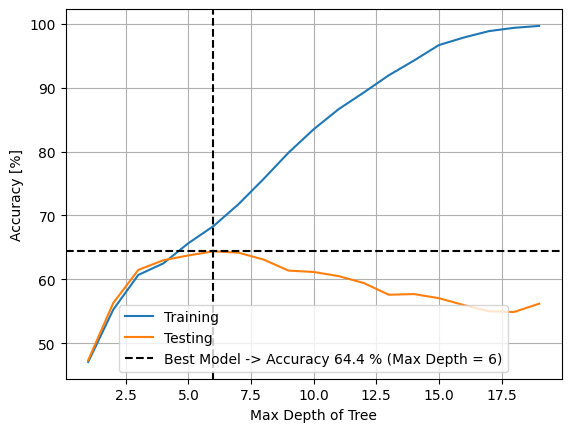

In [ ]:
plt.plot(max_depths, train_acc, label = "Training")
plt.plot(max_depths, test_acc, label = "Testing")
plt.axhline(best_acc, ls = "--", color = "k")
plt.axvline(best_hyper, ls = "--", color = "k", label = f"Best Model -> Accuracy {best_acc:0.1f} % (Max Depth = {best_hyper})")

plt.ylabel("Accuracy [%]")
plt.xlabel("Max Depth of Tree")
plt.legend()
plt.grid()


## 4.3 Random Forests

A random forest is an advanced machine learning algorithm that builds upon decision trees. Instead of relying on a single decision tree, it creates a collection (or "forest") of decision trees and combines their outputs to make more accurate and robust predictions. It is commonly used for both classification and regression tasks.

See [here](https://mlu-explain.github.io/random-forest/?utm_campaign=intro_to_data_series&utm_source=Data_Elixir) for a visual explanation of random forests.

---

### How Does a Random Forest Work?
1. **Build Multiple Decision Trees**:
   - Each tree is trained on a random subset of the training data (using a method called [bootstrap sampling](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))).
   - At each split, the algorithm considers only a random subset of features to decide the best split, adding more randomness.

2. **Combine Outputs**:
   - For classification tasks:
     - Each tree votes for a class.
     - The random forest predicts the majority-voted class.
   - For regression tasks:
     - The random forest averages the predictions from all trees.

---

### Why Use a Random Forest Instead of a Single Decision Tree?
While decision trees are easy to understand and interpret, they can overfit the training data, especially if the tree is deep. Random forests address this by introducing randomness and aggregating results, which leads to:
- **Better Generalization**: Reduces overfitting and improves performance on unseen data.
- **Stability**: Less sensitive to small changes in the training data.

---

### Key Concepts in Random Forests
- **Bootstrap Sampling**:
  - Each tree is trained on a random subset of the data (with replacement), ensuring diversity among trees.
- **Feature Subsampling**:
  - At each split, only a random subset of features is considered, preventing trees from becoming too similar.
- **Ensemble Learning**:
  - The final prediction combines results from multiple trees, leveraging the "wisdom of the crowd."

---

## Why Random Forests are Useful After Learning Decision Trees
Random forests build directly on the principles of decision trees but address their limitations. They are an excellent next step for improving accuracy and robustness while maintaining the interpretability and flexibility of tree-based methods.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)

In [ ]:
model_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:


y_pred = model_1.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred)

y_pred = model_1.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)

print (f"Training accuracy: {training_accuracy}")
print (f"Test accuracy: {testing_accuracy}")


Training accuracy: 0.8574898785425101
Test accuracy: 0.6785329018338727


In [ ]:
best_model = None
best_acc = -1
best_hyper = 0
max_depths = np.arange(1,20)
train_acc = []
test_acc = []

# Loop over the max_depth
for max_depth in max_depths:
    test_model = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=max_depth).fit(X_train, y_train)
    train_acc.append(100*accuracy_score(y_train, test_model.predict(X_train)))
    test_acc.append(100*accuracy_score(y_test, test_model.predict(X_test)))

    if test_acc[-1] > best_acc:
        best_acc = test_acc[-1]
        best_model = test_model
        best_hyper = max_depth


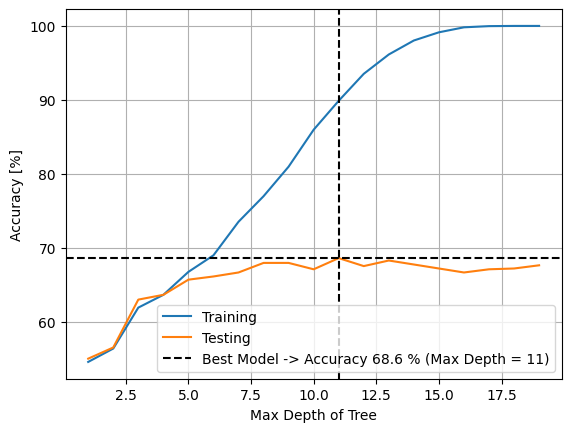

In [ ]:
plt.plot(max_depths, train_acc, label = "Training")
plt.plot(max_depths, test_acc, label = "Testing")
plt.axhline(best_acc, ls = "--", color = "k")
plt.axvline(best_hyper, ls = "--", color = "k", label = f"Best Model -> Accuracy {best_acc:0.1f} % (Max Depth = {best_hyper})")

plt.ylabel("Accuracy [%]")
plt.xlabel("Max Depth of Tree")
plt.legend()
plt.grid()


### What's Happening Here?

We are no longer seeing a decrease in accuracy on the testing dataset, which suggests that our model is generalizing well and not overfitting.

In a **Random Forest** model, each decision tree is trained on a random subset of the data. This means that each individual tree is only exposed to a smaller portion of the data, so it might overfit to that subset. However, because we have multiple trees in the forest, and each one is trained on a different subset, no two trees will overfit in the same way.

When making predictions, we take the average of each tree's vote (or use the majority vote in classification tasks). By averaging the predictions of many trees, we reduce the impact of any single tree's overfitting. This process of aggregation leads to a more generalizable model.

### **Takeaway**:
Random Forests, and other **Ensemble Learning** algorithms, leverage multiple estimators (in this case, decision trees) to make predictions. By training each estimator on a random subsample of the dataset, we mitigate the effects of overfitting. This helps the model remain generalizable and improves its performance on unseen data.


In [ ]:
best_model = None
best_acc = -1
best_hyper = 0
n_estimators = np.logspace(0, 3, 10, dtype = int)
train_acc = []
test_acc = []

# Loop over the number of estimators (trees)
for n_estimator in n_estimators:

    test_model = RandomForestClassifier(n_estimators=n_estimator, criterion="gini", max_depth=16).fit(X_train, y_train)
    train_acc.append(100*accuracy_score(y_train, test_model.predict(X_train)))
    test_acc.append(100*accuracy_score(y_test, test_model.predict(X_test)))

    if test_acc[-1] > best_acc:
        best_acc = test_acc[-1]
        best_model = test_model
        best_hyper = n_estimator


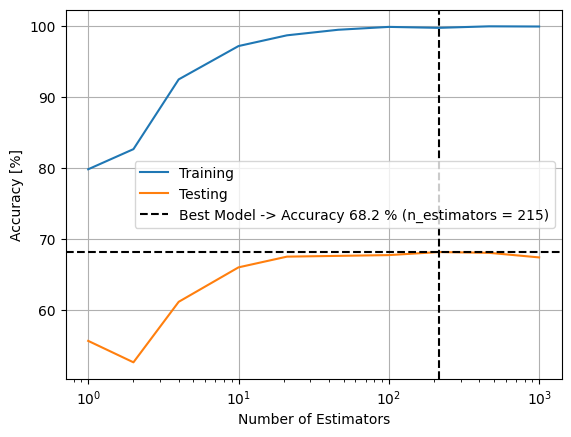

In [ ]:
plt.plot(n_estimators, train_acc, label = "Training")
plt.plot(n_estimators, test_acc, label = "Testing")
plt.axhline(best_acc, ls = "--", color = "k")
plt.axvline(best_hyper, ls = "--", color = "k", label = f"Best Model -> Accuracy {best_acc:0.1f} % (n_estimators = {best_hyper})")

plt.ylabel("Accuracy [%]")
plt.xlabel("Number of Estimators")
plt.xscale('log')
plt.legend()
plt.grid()


## 4.3 Feature importance


Feature importance is a concept in machine learning that helps us understand which features (or inputs) are most influential in making predictions. It assigns a score to each feature, indicating how much it contributes to the model’s decisions.

In the context of decision trees and random forests, feature importance provides insights into how the model splits the data at various points in the tree.

---

## How is Feature Importance Calculated?

### For Decision Trees:
1. **Node Splitting**:
   - At each split in the tree, the algorithm chooses a feature and a threshold that best separates the data.
   - The "quality" of the split is evaluated using metrics like Gini Impurity or Entropy (for classification) or Mean Squared Error (for regression).

2. **Importance Score**:
   - The reduction in the chosen metric (e.g., Gini Impurity) caused by the split is recorded for the selected feature.
   - These reductions are accumulated across all splits where the feature is used.

### For Random Forests:
1. The feature importance from each decision tree in the forest is calculated.
2. The scores are averaged across all trees, providing a robust overall measure of importance.

---

## Why is Feature Importance Useful?

1. **Insights into the Model**:
   - It reveals which features the model relies on most to make predictions.
   - Helps in interpreting the model's behavior.

2. **Feature Selection**:
   - Irrelevant or low-importance features can be removed to simplify the model.
   - Reduces computational cost and risk of overfitting.

3. **Understanding Data Relationships**:
   - Highlights the key factors driving the target variable, which can be valuable for domain-specific insights.


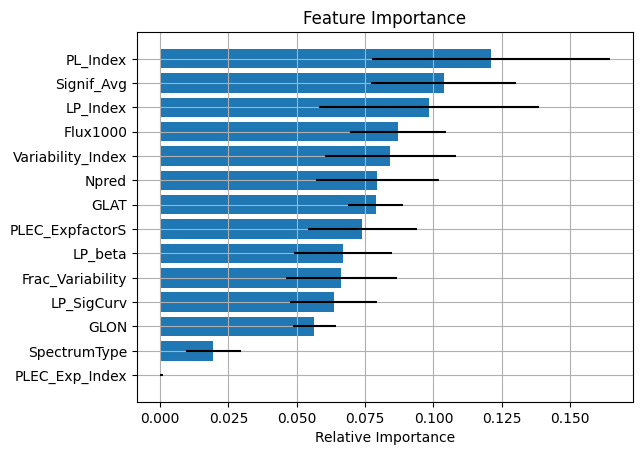

In [ ]:
feature_importance = best_model.feature_importances_

# We have n_estimator number of trees
# Each tree will vary slightly on how they use features
std = np.std([tree.feature_importances_ for tree in best_model.estimators_],
             axis=0)
feature_names = np.array(feature_names)
asort = np.argsort(feature_importance)

plt.title("Feature Importance")
plt.barh(feature_names[asort], feature_importance[asort], xerr = std[asort])
plt.xlabel("Relative Importance")
plt.grid()


<a name="section5"></a>
# 5. Understanding our model

Looking at the feature importance, we can start to understand what our model is picking up as important features of the sources that we've trained on.

## 5.1 The Energy Spectrum

"PL_Index" refers to the "Power Law" spectral index ($\Gamma$) of the fitted power-law model. Non-thermal emission is typically well modeled using a power-law distribution, which describes how the number of particles or photons varies with energy:

$$ \frac{dN}{dE} = N E^{-\Gamma} $$

Where:
- $ \frac{dN}{dE} $ is the number of particles or photons per unit energy,
- $ E $ is the energy of the particles or photons,
- $ \Gamma $ is the power-law index.

More advanced emission mechanisms may manifest as curvature in an otherwise power-law distribution. We can model this curvature using a **Log Parabola (LP)** model, which includes a curvature term $ \beta $:

$$ \frac{dN}{dE} = N E^{-\Gamma - \beta\log(E)} $$

Another common feature seen in the energy spectrum is an **exponential cutoff (EC)**. This occurs when there is attenuation in the emission, possibly due to some physical process limiting the emission at higher energies. The model for this is:

$$ \frac{dN}{dE} = N E^{-\Gamma} \times \exp(-a E^{\Gamma_2}) $$

Where:
- $ a $ is the exponential factor (`PLEC_ExpfactorS`),
- $ \Gamma_2 $ is the exponential index (`PLEX_Exp_Index`).

To simplify the fitting procedure, $ \Gamma_2 $ is typically frozen to a fixed value, which is why we don't gain much additional information from it.

### Key Takeaways:
- **PL_Index / LP_Index**: As the index $ \Gamma $ approaches 1, the spectrum becomes dominated by higher energy photons (more energetic emission). As $ \Gamma $ increases, the spectrum shifts toward lower energy emissions.
- **Curvature (LP_beta) and Curvature Significance (LP_SigCurv)**: These are often weak indicators. This might be due to Fermi-LAT's sensitivity limits, or because most sources do not exhibit significant spectral curvature within the energy range of Fermi-LAT.
- **Exponential Cutoff**: The energy cutoff is similarly weak in Fermi-LAT's range, possibly due to the attenuation mechanisms not being prominent within the observed energy range.

This understanding helps guide our interpretation of the spectral indices and model parameters, allowing for better insight into the nature of the sources we are studying.


## 5.2 Galactic Coordinates

The Galactic Latitude and Longitude have very different importances, suggesting some spatial dependence on the objects, but only in one direction: the Latitude.

As we observe in Longitude, we don't see any strong dependence. This makes sense because we expect the universe to be roughly homogeneous. Similarly, we expect our galaxy to look roughly the same wherever we observe, with one major exception: the **galactic plane**.

![Fermi-LAT all Sky](https://fermi.gsfc.nasa.gov/ssc/Fermi_5_year.jpg)

The central plane of our galaxy is the densest region, so we expect to see a higher density of gamma-ray emitters along the plane.

However, when we move out of this plane, we're no longer observing sources within our galaxy. Instead, we're more likely to be observing extragalactic sources, such as **blazars** or **starburst galaxies**. In fact, in gamma-rays, we typically ignore galactic emission at **galactic longitudes greater than 10 degrees**.

![Galactic coordinates](https://astronomy.ua.edu/wp-content/uploads/sites/2/2016/05/latitude_diagram_300dpi-1024x683.jpg)

[More information on galactic coordinates](https://astronomy.ua.edu/undergraduate-program/course-resources-astronomy/lab-exercise-8-cosmic-distributions-and-the-galactic-ecology/1293-2/)


In [ ]:
X_unknown = df_unknown[keys[:-1]].values
y_pred = best_model.predict(X_unknown)

Let's write a "decoder" to retrieve the encoded source class from the label:

In [ ]:
decoder = {}
for k in encoder:
    decoder[encoder[k]] = k
print(decoder)

# We want to apply this to every item in the array, so we'll use np.vectorize
@np.vectorize
def decode(y):
    return decoder[y]

df_unknown["Targets"] = decode(y_pred)

{0: 'rdg', 1: 'unk', 2: 'sfr', 3: 'nov', 4: 'psr', 5: 'ssrq', 6: 'gal', 7: 'gc', 8: 'snr', 9: 'msp', 10: 'css', 11: 'sey', 12: 'nlsy1', 13: 'sbg', 14: 'hmb', 15: 'fsrq', 16: 'pwn', 17: 'bcu', 18: 'bll', 19: 'glc', 20: 'bin', 21: 'spp', 22: 'agn', 23: 'lmb'}


In [ ]:
Physics and TSI
classes = [k for k in encoder]

binning = np.arange(len(classes) + 1) - 0.5
binw = binning[1:] - binning[:-1]
binc = binning[:-1] + 0.5 * binw
train_counts, _ = np.histogram(y_train, bins=binning, density = True)
test_counts, _ = np.histogram(y_test, bins=binning, density = True)
unknown_counts, _ = np.histogram(y_pred, bins=binning, density = True)




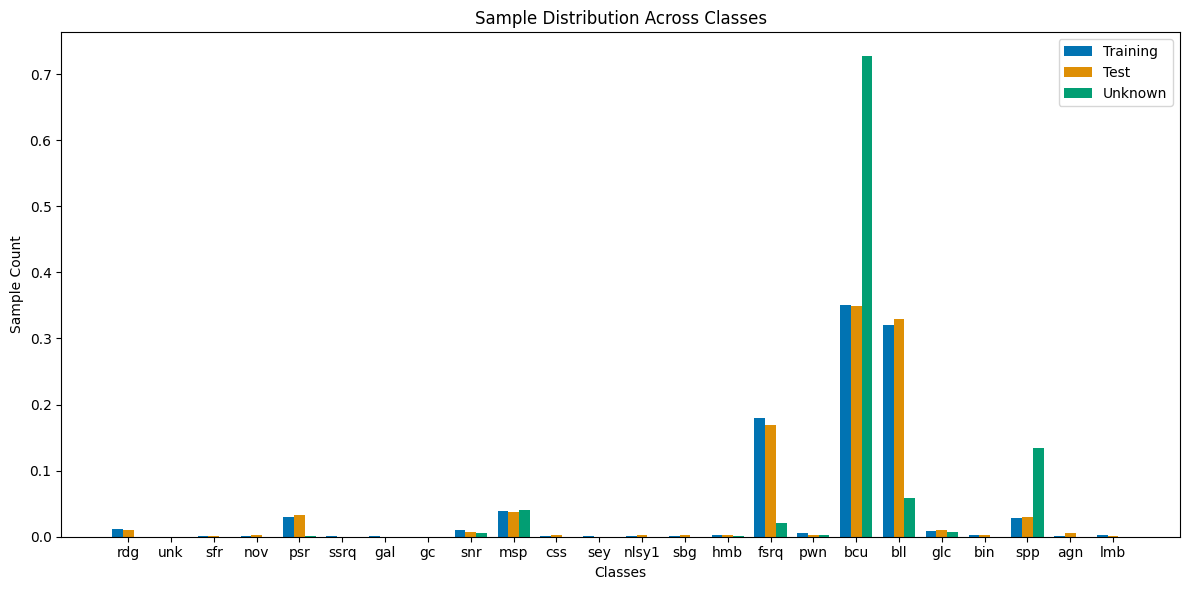

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette('colorblind')

# Sample data: replace these with your actual counts


# Bar width and positions
bar_width = 0.25
positions = np.arange(len(classes))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(positions - bar_width, train_counts, width=bar_width, label='Training', color='C0')
plt.bar(positions, test_counts, width=bar_width, label='Test', color='C1')
plt.bar(positions + bar_width, unknown_counts, width=bar_width, label='Unknown', color='C2')

# Labels and legend
plt.xlabel('Classes')
plt.ylabel('Sample Count')
plt.title('Sample Distribution Across Classes')
plt.xticks(positions, classes)  # Show class labels on the x-axis
plt.legend()

# Show the plot
plt.tight_layout()


## 5.3 So what are the unknown sources?

They're mostly `bcu`, `bll`, and `fsrq`, but what are these?

* These are all blazars. Blazars are active galactic nuclei with relativistic jets oriented closely to the line of sight. `bll` and `fsrq` are BL Lac objects and Flat Spectrum Radio Quasars, both sub-classes of blazars. `bcu` is a blazar of unknown classification (i.e. we're not sure if they're a BL Lac or an FSRQ).
* This is consistent with previous results, see [here](https://academic.oup.com/mnras/article/515/2/1807/6646522?login=false) where they also obtain a similar accuracy using a more advanced model:
  > With the state-of-the-art CATBOOST algorithm, based on gradient boosting decision trees, we are able to reach a **67 percent accuracy on a 23-class data set**.
* See also [here](https://iopscience.iop.org/article/10.3847/1538-4357/ac2e91) where they see a similar distribution of AGN and Pulsars:
  > From our primary sample of 174 Fermi sources with a single X-ray/UV/optical counterpart, we present **132 $P_{bzr}$ > 0.99 likely blazars and 14 $P_{bzr}$ < 0.01 likely pulsars, with 28 remaining ambiguous**.

What about the others?
* `msp` are [Millisecond Pulsars](https://en.wikipedia.org/wiki/Millisecond_pulsar). These are pulsars with a period in the millisecond range. It is believed that there are old pulsars, and that there are many undiscovered MSPs near the center of the galaxy. In fact, this is an alternative hypothesis for potential [dark matter signals from the center of the galaxy](https://en.wikipedia.org/wiki/Galactic_Center_GeV_excess).
* `spp` are ["sources of unknown nature but overlapping with known SNRs or PWNe and thus candidates to these classes"](https://iopscience.iop.org/article/10.3847/1538-4365/ab6bcb). This means that they are unknown sources that happen to overlap with supernova remnants and pulsar wind nebulae.


## 5.4 What does our model tell us?

We can pretty much group the unknown targets into two categories:
* **Extragalactic** - Sources outside of our galaxy, likely just yet to be identified blazars.
* **Galactic** - Likely Millisecond Pulsars, Supernova Remnants, or Pulsar Wind Nebulae.

But this opens some more questions:
* **Why haven't we identified the blazars?** Fermi-LAT's spatial resolution is around [<0.1 degree](https://fermi.gsfc.nasa.gov/science/instruments/table1-1.html). This covers a large area of the sky, making identification challenging!
  
* **Why haven't we seen the Millisecond Pulsars?** MSPs are difficult to detect and require a dedicated survey instrument for discovery.

* **What about Supernova Remnants and Pulsar Wind Nebulae?** This is questionable. We know that the `spp` classification arises due to known overlapping sources. So, why aren't these being classified as `snr` or `pwn`? Our model only has information from Fermi, and we don't know about possible overlapping sources.  
    * **My hypothesis** (Can you test this in your own time?): These sources are located in denser regions (e.g., the galactic plane and near the galactic center). In these coordinates, source confusion might be more likely. Clearly identified `snr` or `pwn` classifications might correspond to sources in less dense regions.


## 5.5 Was this scientifically useful?

Now that we have predictions, we could request time on a dedicated instrument for follow-up observations. I see two potential interesting studies:

* **Blazars**: We have identified a number of blazar candidates. Are any of these blazars located in poorly studied areas of the sky, especially those aligned with the galactic plane? These might be worth following up on. Distant blazars are excellent laboratories to study fundamental physics, such as [Lorentz Invariance Violation](https://www.aanda.org/articles/aa/full_html/2016/01/aa26071-15/aa26071-15.html), [Axion Like Particles](https://iopscience.iop.org/article/10.1088/1674-1137/ac6d4f), and the [Extragalactic Background Light](https://www.science.org/doi/10.1126/science.aat8123).

* **Millisecond Pulsar candidates**: We have some potential millisecond pulsar candidates. These could be followed up with dedicated radio or Very High Energy (VHE) instruments to see if we can detect pulsed emission from nearby sources.

* **Supernova Remnants or Pulsar Wind Nebulae**: We have identified some potential supernova remnants or pulsar wind nebulae. With a dedicated follow-up instrument, we could try to pinpoint the source of the gamma-ray emission.

* **Dark Matter**: Simulations of galaxy formation tell us that we **need** to have Dark Matter Subhalos. Particle physics also tells us that, depending on the type of Dark Matter, we should expect gamma-ray emission from decay and annihilation of Dark Matter.
So if we can catagorize all the unknown sources of gamma-ray emission as normal "stuff", then **we can strongly constrain what Dark Matter is!**


<a name="section6"></a>
# 6. Limitations of Our Model

Using a random forest algorithm, we achieved around 70% accuracy on our testing dataset. Let's consider some of the limitations:

1. **Size of the Training Dataset**: We only had around 3,500 samples in our training dataset, which is relatively small. Real-world problems often use datasets containing hundreds of thousands to millions of samples, which could provide better generalization.

2. **Hyperparameters**: We limited ourselves to tuning only two hyperparameters. In real-world applications, it's common to search a multi-dimensional grid of hyperparameters to find the optimal combination.

3. **Features**: We used a subset of the available features, discarding many correlated ones. There might still be useful information in these features. Perhaps we could have performed [Principal Component Analysis (PCA)](https://scikit-learn.org/1.5/auto_examples/decomposition/plot_pca_iris.html) to help reduce the dimensionality and retain more information.

4. **Labels**: Many labels in the dataset represent similar classes. For example, `bcu`, `bll`, and `fsrq` are all types of blazars. Combining similar labels could have improved the model’s performance by reducing complexity.

5. **Model**: We limited ourselves to decision trees and random forests, which are relatively simple models. More advanced models, such as [XGBoost](https://xgboost.readthedocs.io/en/stable/), [Neural Networks](https://scikit-learn.org/1.5/modules/neural_networks_supervised.html), or [Boosted Decision Trees](https://scikit-learn.org/1.5/auto_examples/ensemble/plot_adaboost_regression.html), tend to outperform simple decision trees in many cases.



<a name="section7"></a>
# 7. Conclusion

In this workshop, we learned:

* How to use `astropy` and `pandas` to work with astronomical catalogs, enabling us to handle and manipulate large sets of astronomical data efficiently.
* The importance of data cleaning and transformation in preparing datasets for machine learning models.
* That cleaning and preprocessing our dataset is often the most crucial step in a successful machine learning workflow, as it directly impacts model performance.
* The fundamentals of decision trees and how to implement them using `scikit-learn` to make predictions.
* The concept of ensemble learning, how to create a random forest using `scikit-learn`, and how it helps mitigate overfitting by leveraging multiple estimators.
* That real-world datasets often have limitations, and it's important to recognize these limitations to improve model accuracy and reliability.

